In [ ]:
# Основной пакет
# pip install qiskit
# Дополнительный пакет для графического представления результатов работы. Например в NoteBook
# pip install qiskit[visualization]

: 

> `Библиотеки лучше ставить на чистую виртульную среду т.к. они подгружают около 30 дополнительных библиотек релевантных версий, для корректной работы`

# Попробуем разобратся, что такое квантовое программирование


## <span id="teg1">1. [Немного теории](#sod)</span>

### <span id="teg11">[Что такое кубит?](#sod)</span>

> Как и бит, кубит допускает два собственных состояния, обозначаемых $|0\rangle$ и $|1\rangle$  (обозначения Дирака), но при этом может находиться и в их суперпозиции. В общем случае его волновая функция имеет вид ${\displaystyle \alpha|0\rangle +\beta|1\rangle }$, где $\alpha$ и $\beta$ называются амплитудами вероятностей и являются комплексными числами, удовлетворяющими условию $|\alpha|^{2}+|\beta|^{2}=1$. Состояние кубита удобно представлять как стрелку на сфере Блоха.  

![Блок сфера](Bloch_Sphere2.jpg "Блок сфера")

>При измерении состояния кубита можно получить лишь одно из его собственных состояний. Вероятности получить каждое из них равны соответственно $|\alpha|^{2}$ и $|\beta|^{2}$. Как правило, при измерении состояние кубита необратимо разрушается, чего не происходит при измерении классического бита.  

<font color="#00bfff">Простыми словами, как я понимаю: </font>  

> Кубит q — это сумма двух векторов $\alpha$ и $\beta$, где $\alpha$ и $\beta$ — комплексные числa, но не совсем любые, а чтобы сумма модулей их квадратов была равна единице.
$$q=\alpha|0\rangle +\beta|1\rangle$$
$$\alpha,\beta\in\mathbb{C}$$
$$|\alpha|^{2}+|\beta|^{2}=1$$


### <span id="teg12">[Что с ним можно делать?](#sod)</span>

#### $\color{green}Измерить$

Первое, что мы привыкли делать, — попробовать посчитать значение нашей переменной. Мы хотим прочитать, в каком состоянии находится кубит.
```python
print(q)
```  
Но это не сработает. Мы никогда не узнаем точные значение α и β. Если мы попробуем посмотреть на кубит, прочитать, то мы получим или нолик, или единичку с соответствующими вероятностями.  

#### $\color{green}Скопировать$

```python
p = q
```
Операции присваивания нет, и это связано с тем, что мы даже не сможем посмотреть точное значение. Даже [теорема о запрете клонирования](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0_%D0%BE_%D0%B7%D0%B0%D0%BF%D1%80%D0%B5%D1%82%D0%B5_%D0%BA%D0%BB%D0%BE%D0%BD%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F) есть.



### <span id="teg13">[Есть кубит, который мы не можем прочитать, не можем склонировать. Что можно вообще делать?](#sod)</span>

Кубит — это вектор. Вектор можно взять и покрутить по сфере вокруг. Чтобы покрутить, можно придумать матрицу, которая это вращение делает. Все операции над кубитами — это матрицы. Они называются унитарными.  
Унитарные — это  очень важное свойство, оно означает, что для любой операции есть обратная. То есть как бы мы ни покрутили вектор, мы всегда можем его вернуть в прежнее положение. Всегда существует обратная операция.

## <span id="teg2">2. [Наконец-то практика](#sod)</span>

Главное, что я вынес из теоретической части, это то что с кубитом можно проводить некие операции, нфзываемые операторами или вентилями(от gate) и получать результаты в виде: вероятно 1 или вероятно 0.  
Создадим среду для работы:  
  
$\color{green}Импорт\spaceпакетов$ 

In [ ]:
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister, execute
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram


### <span id="teg21">[Операторы](#sod)</span>

$\color{green}Оператор\space NOT$

У оператора отрицания есть стандартная запись, оператор X. Если подумать, это просто вращение вокруг одной из осей. И есть операторы Y и Z, вращение вокруг других осей, но это сейчас не так важно.

{'0': 1000}


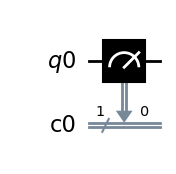

In [ ]:
# Высокопроизводительный симулятор имитирующий настоящее квантовое устройство
simulator = AerSimulator()
# Инициализируем 1 кубит в 0м состоянии
q = QuantumRegister(1)
# Классический бит, куда отражается состояние кубита
c = ClassicalRegister(1)
# Создаем квантовую схему, связываем кубит с битом
# Результат измерения i-го кубита будет храниться в i-м классическом бите
circuit = QuantumCircuit(q, c)
# Измерение
circuit.measure(q, c)
# Компилируем схему, применяя к ней базовый набор операторов
compiled_circuit = transpile(circuit, simulator)
# Делаем 1000 замеров
job = simulator.run(compiled_circuit, shots=1000)
res = job.result()
print(res.get_counts(compiled_circuit))
circuit.draw("mpl")

Естесвенно получили 0. Ведь инициализировали его в 0 состояние.  
Применим оператор NOT

{'1': 1000}


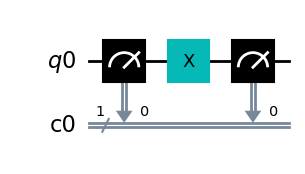

In [ ]:
circuit.x(0)
circuit.measure(q, c)
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=1000)
res = job.result()
print(res.get_counts(compiled_circuit))
circuit.draw("mpl")

Теперь с вероятностью единичка получим единичку, как и планировали. Работает, ура я квантовый программист!  

$\color{green}Оператор\space Адамара$ 

Этот оператор ставит кубит в интересную суперпозицию. Если ее измерить, то с вероятностью 50% получим или нолик, или единичку. То есть это будет такая равномерная суперпозиция, можем получить что угодно.

Можно провести аналогию, что это такое квантовое подбрасывание монетки.  
Обозначается как оператор H. 

{'1': 498, '0': 502}


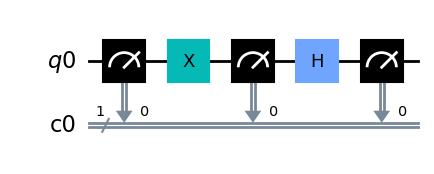

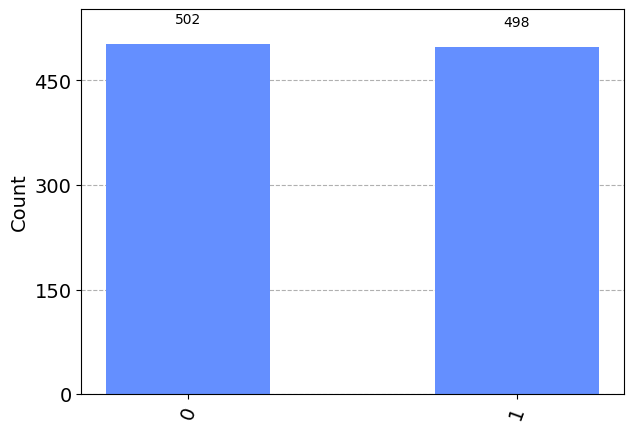

In [ ]:
circuit.h(0)
circuit.measure(q, c)
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=1000)
res = job.result()
print(res.get_counts(compiled_circuit))
display(circuit.draw("mpl"))
plot_histogram(res.get_counts(compiled_circuit))

Замерим и получим примерно то, что ожидаем. Примерно с вероятностью 50%, нолик и единичка. Чуть больше, чуть меньше, но так уж получается.  
Бросим еще раз.


{'0': 490, '1': 510}


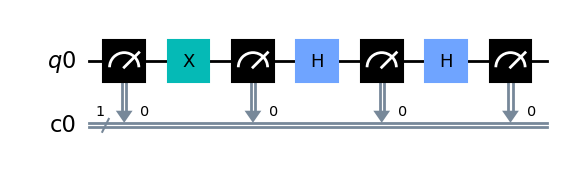

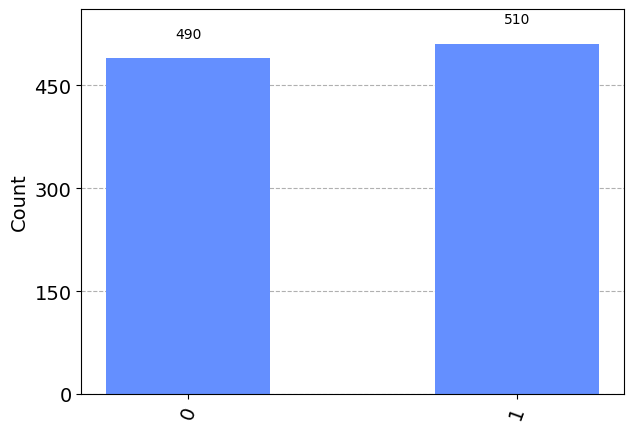

In [ ]:
circuit.h(0)
circuit.measure(q, c)
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=1000)
res = job.result()
print(res.get_counts(compiled_circuit))
display(circuit.draw("mpl"))
plot_histogram(res.get_counts(compiled_circuit))


Итак, с одним кубитом можно что-то делать. Можно крутить, вертеть и измерять. Давайте попробуем добавить побольше кубит.  

$\color{green}Операторы\space AND\space и\space OR$ 

В квантовом мире так делать нельзя, потому что они не совсем обратимые. То есть, получая ноль в операции «и», мы никогда не сможем узнать, какие были начальные значения.  

$\color{green}Оператор\space CNOT$ 

Все, к чему мы привыкли, рушится. Но появляется новый герой, это оператор так называемого контролируемого отрицания.  
CNOT можно представить в виде таблицы истинности:

|Вход|Вход| |Выход|Выход|
|:---:|:---:|:---:|:---:|:---:|
|0|0|=>|0|0| 
|0|1|=>|0|1|
|1|0|=>|1|1|
|1|1|=>|1|0|

Обозначается как оператор CX.


{'00': 514, '11': 486}


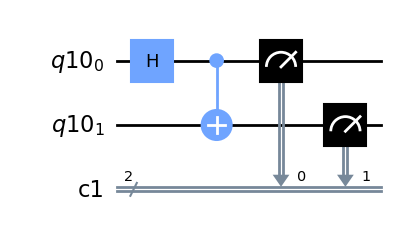

In [ ]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
circuit = QuantumCircuit(q, c)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure(q, c)
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
print(result.get_counts(compiled_circuit))
circuit.draw("mpl")

Теперь это состояние называется запутанным.  
То есть если я сделаю такое преобразование своими кубитами, один кубит отдам своему другу, он улетит в другой город, а я второй кубит измерю у себя, я буду точно знать, в каком состоянии его кубит. Это называется эффектом квантовой запутанности или квантовой связанности. И это основной механизм, с помощью которого квантовые вычисления работают. Они связаны очень жестко, и во время измерения мы можем получить только |00⟩ или |11⟩.

$\color{green}Оператор\space CCNOT\space или\space Вентиль\space Тоффоли$ 

Это уже запутывание 3х кубитов  
Имеет три входа и три выхода, если два первых входа равны единице, то значение последнего бита обращается. В противном случае все входы подаются на выход неизменными.  
CCNOT можно представить в виде таблицы истинности:

|Вход|Вход|Вход| |Выход|Выход|Выход|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|0|0|0|=>|0|0|0| 
|0|0|1|=>|0|0|1|
|0|1|0|=>|0|1|0|
|0|1|1|=>|0|1|1|
|1|0|0|=>|1|0|0| 
|1|0|1|=>|1|0|1|
|1|1|0|=>|1|1|1|
|1|1|1|=>|1|1|0|

Обозначается как оператор CCX.

$\color{green}Вентиль\space Фредкина$ 

Имеет три входа и три выхода. Если первый вход равен 1, то второй и третий вход меняются местами.  
Таблица истинности:  

|Вход|Вход|Вход| |Выход|Выход|Выход|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|0|0|0|=>|0|0|0| 
|0|0|1|=>|0|0|1|
|0|1|0|=>|0|1|0|
|0|1|1|=>|0|1|1|
|1|0|0|=>|1|0|0| 
|1|0|1|=>|1|1|0|
|1|1|0|=>|1|0|1|
|1|1|1|=>|1|1|1|  

Вентиль Фредкина, наряду с вентилем Тоффоли, являются широко известными универсальными обратимыми трехвходовыми вентилями, с помощью любого из них возможна реализация любой обратимой логической функции.  
Обозначается как оператор fredkin


## <span id="teg3">[Основные квантовые алгоритмы](#sod)</span>

1. Разложение на множители десятичного числа к с n=k•ln(10) – числом двоичных знаков. 
    Лучший классический алгоритм (общий метод решета числового поля) требует экспоненциального числа операций.

    exp((64/9)1/3n1/3(ln(n))2/3)

    Квантовый алгоритм Шора (1994) требует только n2ln(n)ln(ln(n)) операций.

2. Поиск записи в неотсортированной базе данных с N записями
    Классически потребуется O(N) шагов, в среднем N/2. Квантовый алгоритм Гровера (1996) находит запись за O(SQRT(N)) шагов

3. Решение систем линейных уравнений
    Пусть заданы n×n разреженная матрица A с числом обусловленности к и n-мерный вектор b. Тогда для решения системы уравнений Ax=b (x и b - вектора) классическому алгоритму нужно O(n2÷3SQRT(k)) операций, а квантовому HHL алгоритму (A.W.Harrow, A.Hassidim, S.Lloyd, Phys. Rev. Lett. vol. 15, № 103, pp. 150502, 2009) только O(ln(n) k2) операций.

На персональном компьютере с памятью 32ГБ можно смоделировать квантовый компьютер на 30 кубит.

## <span id="teg3">[Вывод](#sod)</span>

Не все так страшно. Тема очень интересная, и достойна дальнейшего изучения.  
Если попробовать вбить "квантовый программист" в поисковике, то уже сегодня можете найти вакансии. Конечно, там больше исследований, но тем не менее. 



## <span id="teg3">[Дополнительная работа. Генератор числа [0-$2^3$]](#sod)</span>

6 4 0 1 4 3 2 6 2 1


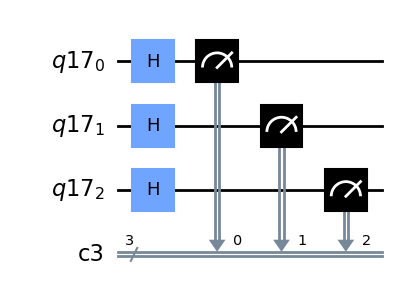

In [ ]:
sim = AerSimulator()
qq = QuantumRegister(3)
cc = ClassicalRegister(3)
circ = QuantumCircuit(qq, cc)
for i in range(3):
    circ.h(i)
circ.measure(qq, cc)
comp_circ = transpile(circ, sim)
# Сгенерируем 10 чисел
list_out = []
for i in range(10):
    bit_string = list(simulator.run(comp_circ, shots=1).result().get_counts().keys())[0]
    list_out.append(int(bit_string, 2))
print(*list_out)
circ.draw("mpl")